In [1]:
import pandas as pd
import os
import numpy as np
import school_analysis as sa
import re
from datetime import datetime

def load_genisis_df(name:str):
    path=os.path.join(sa.PROJECT_PATH, "data", "genesis",name)
    df = pd.read_csv(os.path.join(sa.PROJECT_PATH ,path), sep=";", skiprows=7, skipfooter=4, engine="python", index_col=None, header=None)
    df.replace("b'", "", inplace=True, regex=True)
    df.replace("'", "", inplace=True, regex=True)
    df.set_index(1, inplace=True)
    return df

df_1=load_genisis_df("graduates_1.csv")
df_2=load_genisis_df("graduates_2.csv")
df_2 = df_2.drop(0, axis=1)
df_3 = load_genisis_df("graduates_3.csv")
df_3 = df_3.drop(0, axis=1)
df = pd.concat([df_1, df_2, df_3], axis=1)
df

,0,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
1,,,,,,,,,,,,,,,,,,,,,
NaN,,1998/99,NaN,NaN,1999/00,NaN,NaN,2000/01,NaN,NaN,...,NaN,2019/20,NaN,NaN,2020/21,NaN,NaN,2021/22,NaN,
NaN,,Sex,NaN,NaN,Sex,NaN,NaN,Sex,NaN,NaN,...,NaN,Sex,NaN,NaN,Sex,NaN,NaN,Sex,NaN,
NaN,,Male,Female,Total,Male,Female,Total,Male,Female,Total,...,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total
NaN,Baden-W\xc3\xbcrttemberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
Without secondary general school certificate,Secondary general schools,2124,1221,3345,2165,1260,3425,2204,1211,3415,...,993,406,282,688,534,307,841,608,412,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
None,of entrance qualification for universities of ...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
None,sciences.,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
None,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [2]:
def parse_and_convert_years(strings):
    valid_dates = []
    pattern = r"^(\d{4})/\d{2}$"

    for s in strings:
        if not isinstance(s, str):
            continue
        match = re.match(pattern, s)
        if match:
            year = match.group(1)
            date_str = f"{year}-01-01"
            valid_dates.append(datetime.strptime(date_str, "%Y-%m-%d"))

    return valid_dates


years = parse_and_convert_years(list(df.iloc[0,:]))
total_students_without_graduates = []

for i, year in enumerate(years):
    x = df.iloc[:,3+3*i:4+3*i] #Filter year
    no_degrees = x.loc['Without secondary general school certificate'] #Filter without secondary school certificate (Kein Hauptschulabschluss)
    no_degrees = no_degrees.apply(pd.to_numeric, errors='coerce').sum().sum() 
    total_sum = x.loc['Total'] #Filter without secondary school certificate (Kein Hauptschulabschluss)
    total_sum = total_sum.apply(pd.to_numeric, errors='coerce').sum().sum() 
    total_students_without_graduates.append(no_degrees/total_sum)
   

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

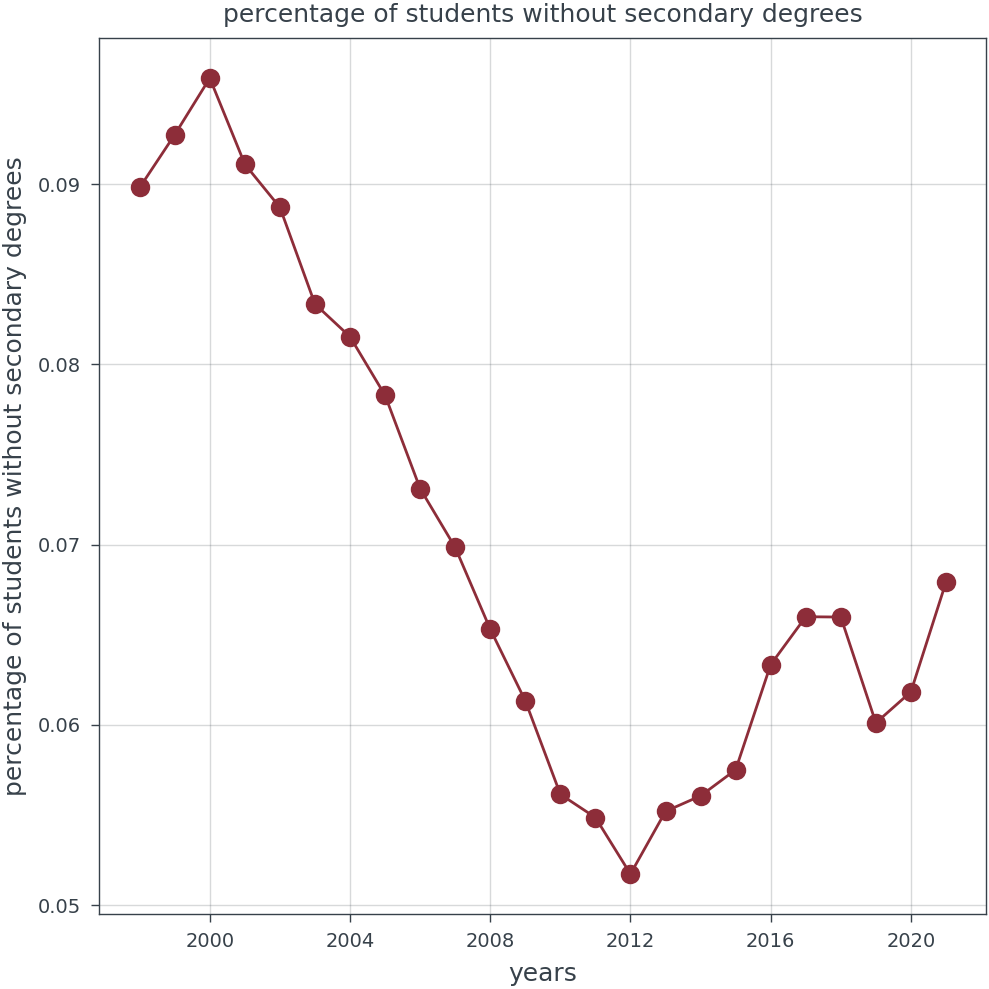

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))  # Breite und Höhe in Zoll


plt.plot(years, total_students_without_graduates, marker='o')
plt.xlabel('years')
plt.ylabel('percentage of students without secondary degrees')
plt.title('percentage of students without secondary degrees', fontsize=25)
plt.grid(True)
plt.show()